In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
import re
import os

In [2]:
data_Gucci = pd.read_csv('data/df_Gucci_canada_US.csv')
data_LV = pd.read_csv('data/df_LV_canada_UK.csv')
data_LP = pd.read_csv('data/df_LP_canada_US.csv')

data = pd.concat([data_Gucci, data_LV, data_LP], ignore_index=True)

In [3]:
# Write the DataFrame back to a CSV file
data.to_csv('Final_data.csv', index=False)
data

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount,Category,Group
0,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,LIPS,N.A.,6478599PL139216,216 My Cousin Rachel Rouge De Beauté Brillant,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,61.0,61.0,41.07,41.07,0,MAKEUP,OTHER
1,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,702394J85H08268,Gucci Link to Love baguette tourmaline necklace,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,5630.0,5630.0,3791.24,3791.24,0,ACCESSORIES,WOMEN
2,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,FACE,N.A.,7026019PRD99005,05 Gucci Blush De Beauté,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,67.0,67.0,45.11,45.11,0,MAKEUP,OTHER
3,Gucci,2023-11-17,CAN,CAD,GUCCI,HANDBAGS,SHOULDER-BAGS-FOR-WOMEN,N.A.,702721U3ZDT3760,Gucci Diana small tote bag,https://www.gucci.com/ca/en/pr/women/handbags/...,http://media.gucci.com/style/White_South_0_160...,5155.0,5155.0,3471.38,3471.38,0,BAGS,WOMEN
4,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,745649J85008000,Gucci Link to Love double earrings,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,7670.0,7670.0,5164.98,5164.98,0,ACCESSORIES,WOMEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28576,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,TROUSERS-AND-SHORTS,N.A.,FAN4351,G,https://us.loropiana.com/en/p/woman/trousers-a...,https://media.loropiana.com/HYBRIS/FAN/FAN4351...,9625.0,9625.0,8879.15,8879.15,0,CLOTHING,WOMEN
28577,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,ACCESSORIES,HATS,FAN4625,E,https://us.loropiana.com/en/p/woman/accessorie...,https://media.loropiana.com/HYBRIS/FAN/FAN4625...,750.0,750.0,691.88,691.88,0,ACCESSORIES,WOMEN
28578,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,LEATHER-GOODS,TOP-HANDLE-AND-TOTES,FAN4833,L,https://us.loropiana.com/en/p/fall-winter/woma...,https://media.loropiana.com/HYBRIS/FAN/FAN4833...,5325.0,5325.0,4912.36,4912.36,0,BAGS,WOMEN
28579,Loro Piana,2023-11-17,USA,USD,LORO PIANA,MAN,KNITWEAR,N.A.,FAN4943,S,https://us.loropiana.com/p/holiday-season/man/...,https://media.loropiana.com/HYBRIS/FAN/FAN4943...,6600.0,6600.0,6088.56,6088.56,0,CLOTHING,MEN


In [8]:
specific_columns = data[['brand', 'country_code', 'itemurl','full_price_eur','Group','Category']]
specific_columns

,brand,country_code,itemurl,full_price_eur,Group,Category
0,GUCCI,CAN,https://www.gucci.com/ca/en/pr/beauty/make-up/...,41.07,OTHER,MAKEUP
1,GUCCI,CAN,https://www.gucci.com/ca/en/pr/jewelry-watches...,3791.24,WOMEN,ACCESSORIES
2,GUCCI,CAN,https://www.gucci.com/ca/en/pr/beauty/make-up/...,45.11,OTHER,MAKEUP
3,GUCCI,CAN,https://www.gucci.com/ca/en/pr/women/handbags/...,3471.38,WOMEN,BAGS
4,GUCCI,CAN,https://www.gucci.com/ca/en/pr/jewelry-watches...,5164.98,WOMEN,ACCESSORIES
...,...,...,...,...,...,...
28576,LORO PIANA,USA,https://us.loropiana.com/en/p/woman/trousers-a...,8879.15,WOMEN,CLOTHING
28577,LORO PIANA,USA,https://us.loropiana.com/en/p/woman/accessorie...,691.88,WOMEN,ACCESSORIES
28578,LORO PIANA,USA,https://us.loropiana.com/en/p/fall-winter/woma...,4912.36,WOMEN,BAGS
28579,LORO PIANA,USA,https://us.loropiana.com/p/holiday-season/man/...,6088.56,MEN,CLOTHING


## Summary Statistics of price for each brand

In [7]:
Gucci_data = data[data['brand'] == 'GUCCI']
LV_data = data[data['brand'] == 'LOUIS VUITTON']
LP_data = data[data['brand'] == 'LORO PIANA']


In [8]:
# Descriptive statistics for Brand 1
Gucci_stats = Gucci_data['full_price_eur'].describe()

# Descriptive statistics for Brand 2
LV_stats = LV_data['full_price_eur'].describe()

# Descriptive statistics for Brand 3
LP_stats = LP_data['full_price_eur'].describe()


In [13]:
# Print descriptive statistics for each brand
print("Descriptive Statistics for Gucci Price:")
print(Gucci_stats)

print("\nDescriptive Statistics for Louis Vuitton Price:")
print(LV_stats)

print("\nDescriptive Statistics for Loro Piana Price:")
print(LP_stats)


Descriptive Statistics for Gucci Price:
count    10949.000000
mean      1461.122729
std       2623.315347
min         28.280000
25%        434.340000
50%        841.750000
75%       1717.170000
max      65237.650000
Name: full_price_eur, dtype: float64

Descriptive Statistics for Louis Vuitton Price:
count     15892.000000
mean       2995.663818
std        9883.527165
min          19.420000
25%         565.710000
50%        1137.140000
75%        2659.930000
max      249158.240000
Name: full_price_eur, dtype: float64

Descriptive Statistics for Loro Piana Price:
count     1740.000000
mean      2554.359885
std       3126.074090
min        107.740000
25%        761.037500
50%       1499.070000
75%       3021.210000
max      30834.870000
Name: full_price_eur, dtype: float64


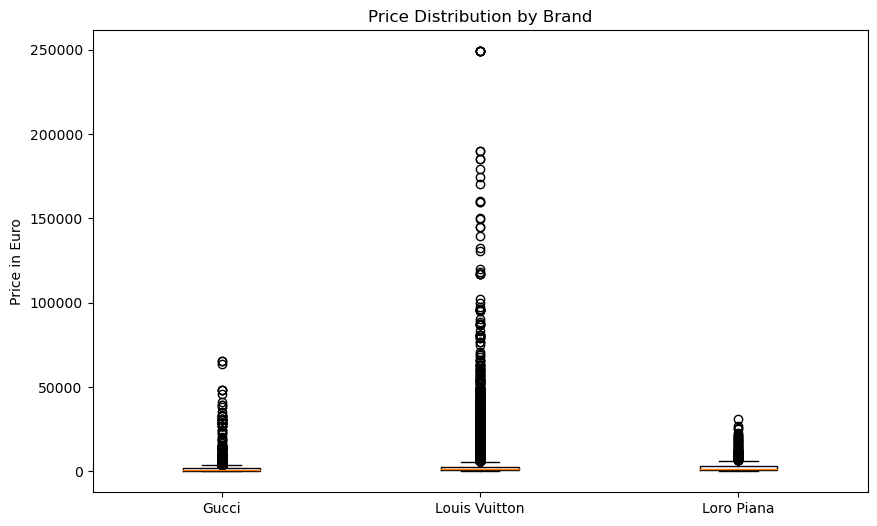

In [14]:
import matplotlib.pyplot as plt

# Box plot for price distribution of each brand
plt.figure(figsize=(10, 6))
plt.boxplot([Gucci_data['full_price_eur'],LV_data['full_price_eur'], LP_data['full_price_eur']], labels=['Gucci', 'Louis Vuitton', 'Loro Piana'])
plt.title('Price Distribution by Brand')
plt.ylabel('Price in Euro')
plt.show()


## Highest Price Category

In [51]:
import pandas as pd

# Find the row with the highest price
max_price_row_gucci = Gucci_data.loc[Gucci_data['full_price_eur'].idxmax()]

# Get the category of the item with the highest price
highest_price_category_gucci = max_price_row_gucci['Category']

highest_price_gucci = max_price_row_gucci['full_price_eur']

# Display the category
print("Category of the item with the highest price ",highest_price_gucci," for Gucci:", highest_price_category_gucci)

#Find the row with the highest price
max_price_row_LV = LV_data.loc[LV_data['full_price_eur'].idxmax()]

# Get the category of the item with the highest price
highest_price_category_LV = max_price_row_LV['Category']
highest_price_LV = max_price_row_LV['full_price_eur']


# Display the category
print("Category of the item with the highest price ",highest_price_LV," for Louis Vuitton:", highest_price_category_LV)

#Find the row with the highest price
max_price_row_LP = LP_data.loc[LP_data['full_price_eur'].idxmax()]

# Get the category of the item with the highest price
highest_price_category_LP = max_price_row_LP['Category']
highest_price_LP = max_price_row_LP['full_price_eur']

# Display the category
print("Category of the item with the highest price ",highest_price_LP," for Loro Piana:", highest_price_category_LP)


Category of the item with the highest price  65237.65  for Gucci: BAGS
Category of the item with the highest price  249158.24  for Louis Vuitton: TRAVEL
Category of the item with the highest price  30834.87  for Loro Piana: CLOTHING


In [48]:
## Lowest Price Category


In [53]:
import pandas as pd

# Find the row with the highest price
min_price_row_gucci = Gucci_data.loc[Gucci_data['full_price_eur'].idxmin()]

# Get the category of the item with the highest price
lowest_price_category_gucci = min_price_row_gucci['Category']
lowest_price_gucci = min_price_row_gucci['full_price_eur']


# Display the category
print("Category of the item with the lowest price ",lowest_price_gucci," for Gucci:", lowest_price_category_gucci)

#Find the row with the highest price
min_price_row_LV = LV_data.loc[LV_data['full_price_eur'].idxmin()]

# Get the category of the item with the highest price
lowest_price_category_LV = min_price_row_LV['Category']
lowest_price_LV = min_price_row_LV['full_price_eur']


# Display the category
print("Category of the item with the lowest price ",lowest_price_LV," for Louis Vuitton:", lowest_price_category_LV)

#Find the row with the highest price
min_price_row_LP = LP_data.loc[LP_data['full_price_eur'].idxmin()]

# Get the category of the item with the highest price
lowest_price_category_LP = min_price_row_LP['Category']
lowest_price_LP = min_price_row_LP['full_price_eur']


# Display the category
print("Category of the item with the lowest price ",lowest_price_LP," for Loro Piana:", lowest_price_category_LP)


Category of the item with the lowest price  28.28  for Gucci: MAKEUP
Category of the item with the lowest price  19.42  for Louis Vuitton: DECOR/HOME
Category of the item with the lowest price  107.74  for Loro Piana: ACCESSORIES


## Statistics based on each group of each brand

In [23]:
data['Group'].unique()

array(['OTHER', 'WOMEN', 'GENDER NEUTRAL', 'BOYS', 'GIRLS', 'KIDS', 'MEN'],
      dtype=object)

### Men Group Statistics

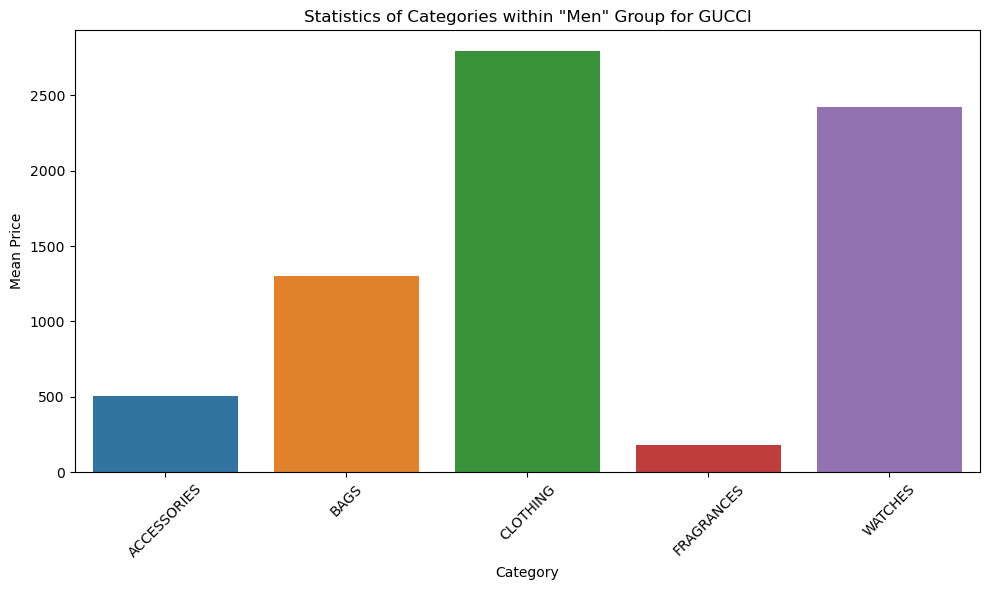

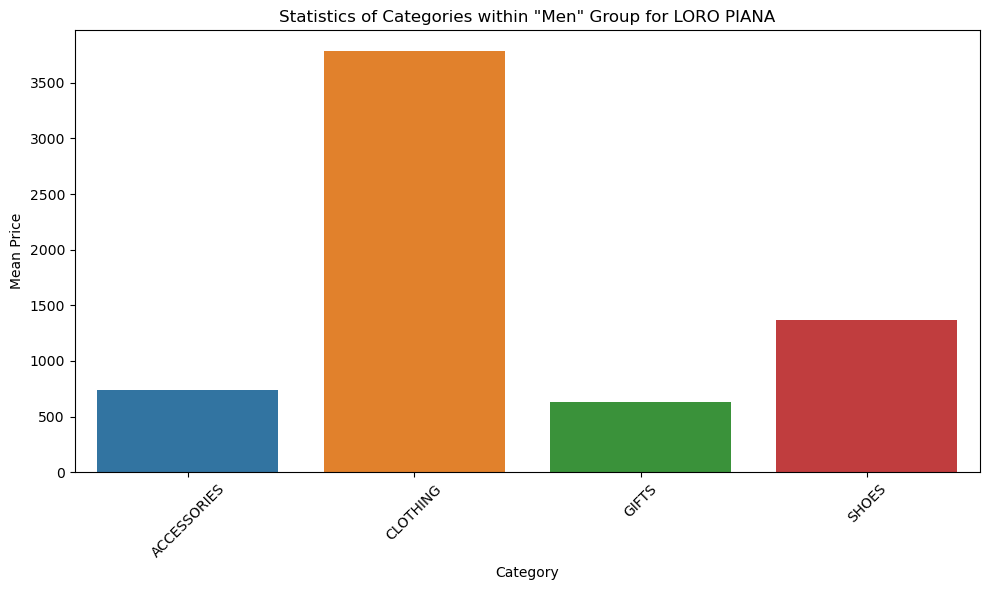

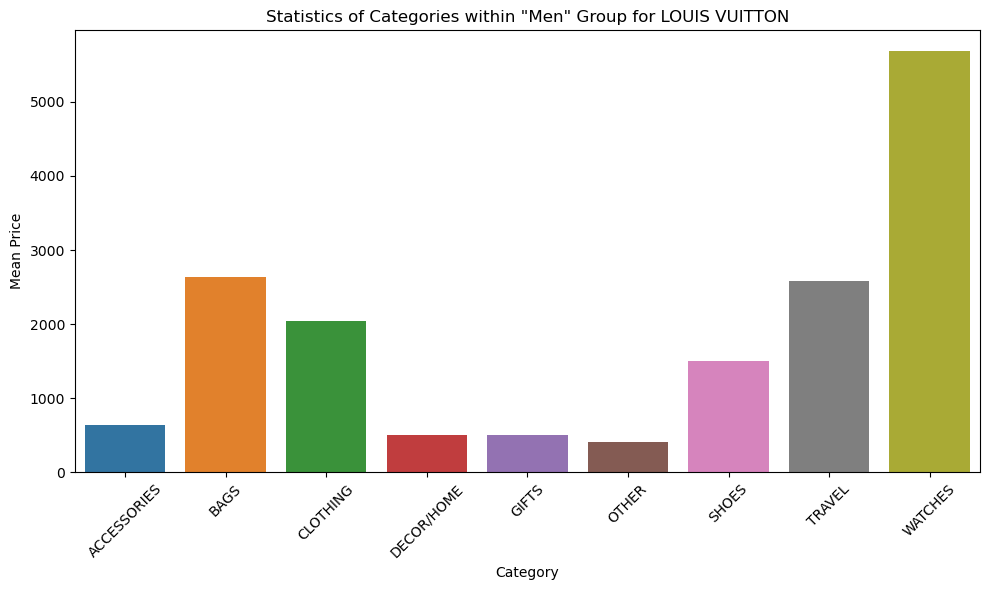

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
men_data = data[data['Group'] == 'MEN']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_men = men_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand
for brand in category_stats_men['brand'].unique():
    brand_data = category_stats_men[category_stats_men['brand'] == brand]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='full_price_eur', data=brand_data)
    plt.title(f'Statistics of Categories within "Men" Group for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/311671134.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

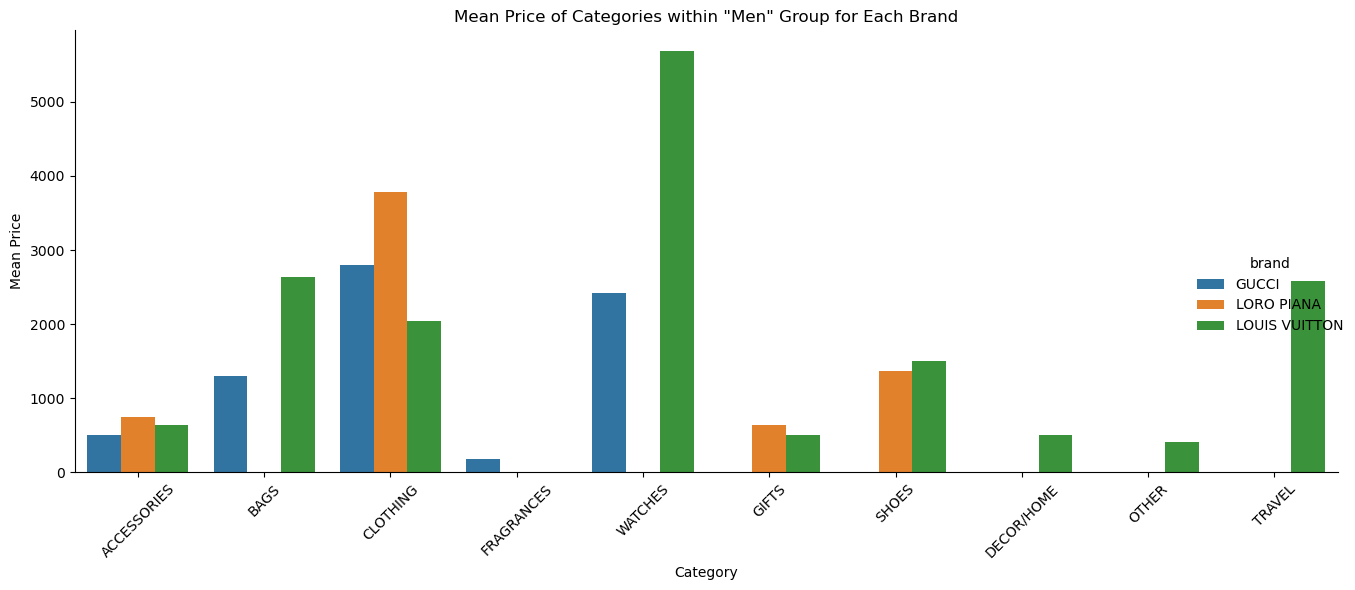

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
men_data = data[data['Group'] == 'MEN']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_men = men_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_men, height=6, aspect=2)
plt.title('Mean Price of Categories within "Men" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Women Group Statistics


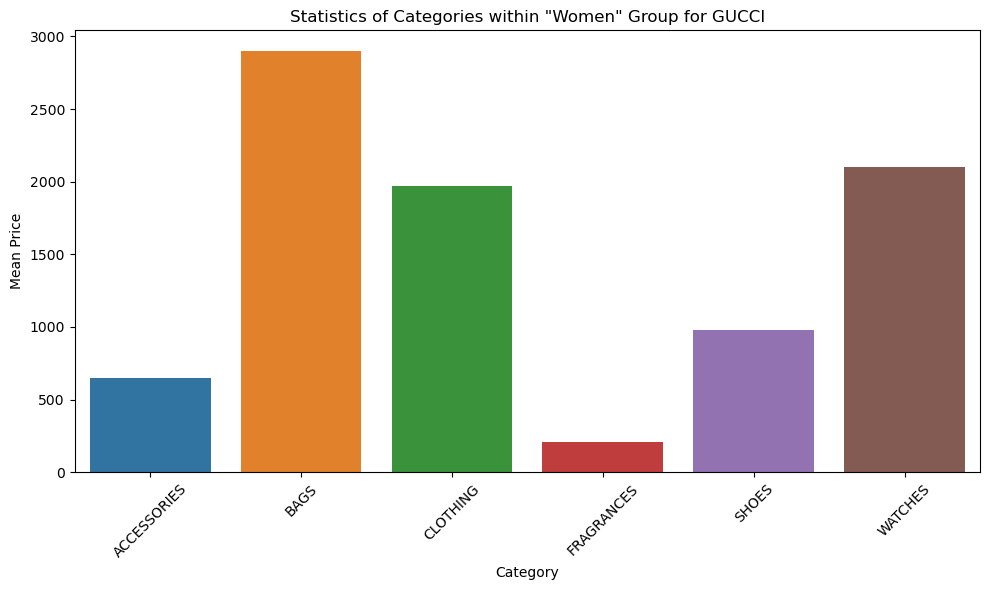

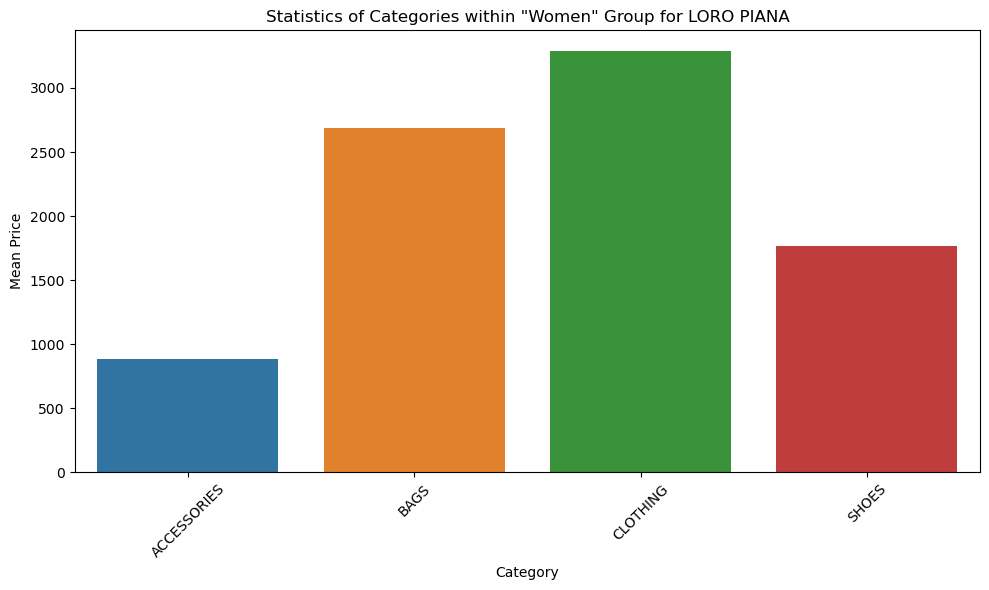

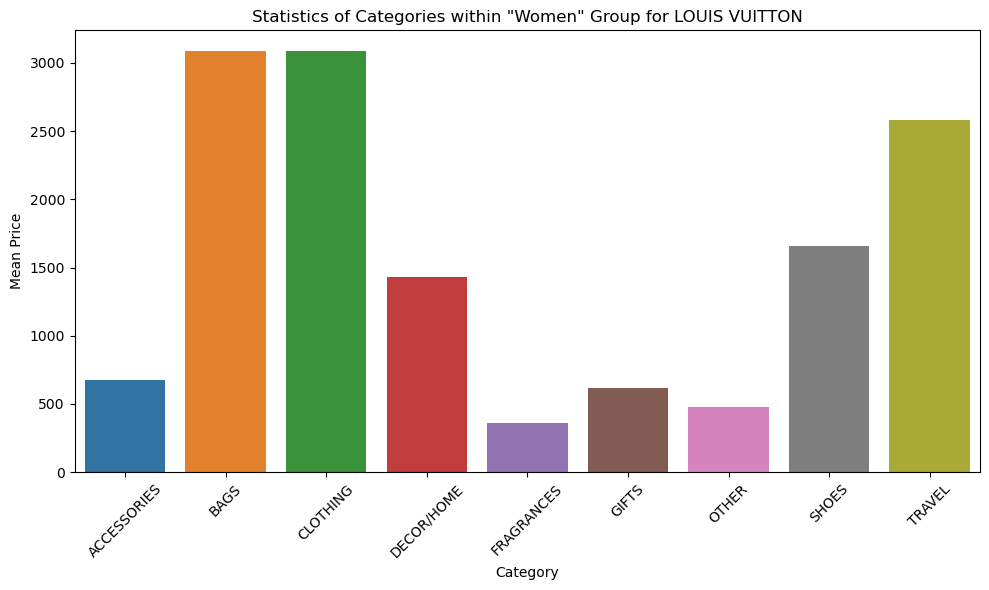

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
women_data = data[data['Group'] == 'WOMEN']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_women = women_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand
for brand in category_stats_women['brand'].unique():
    brand_data = category_stats_women[category_stats_women['brand'] == brand]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='full_price_eur', data=brand_data)
    plt.title(f'Statistics of Categories within "Women" Group for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/2402757148.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

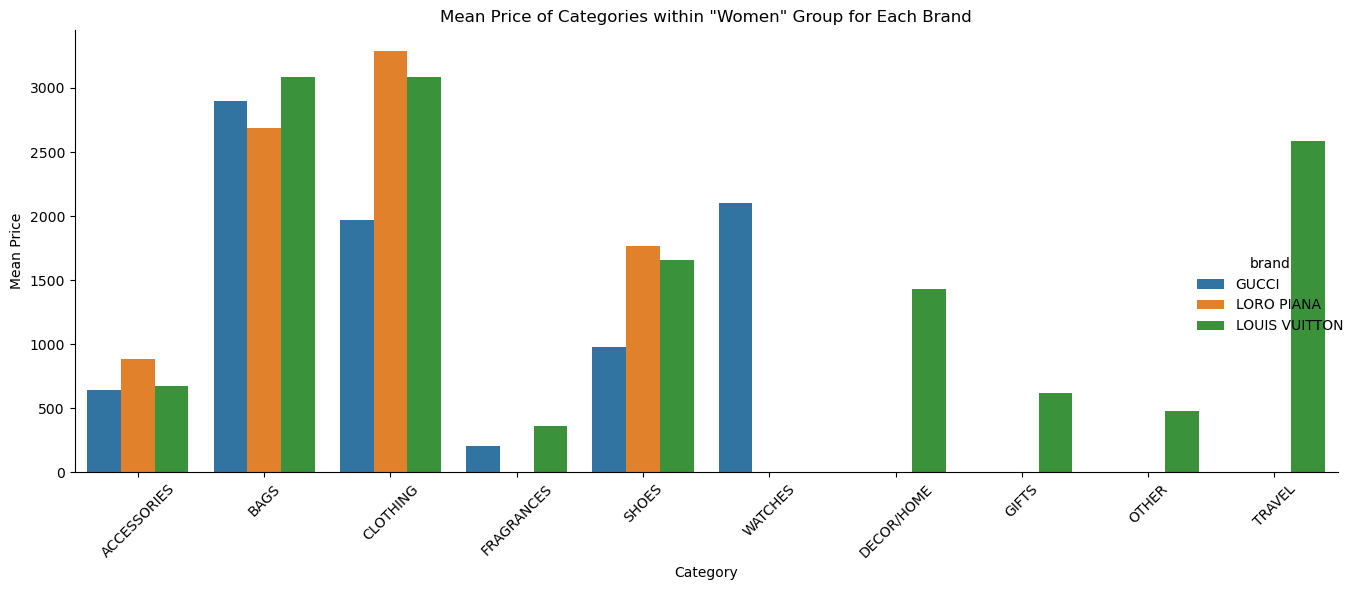

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "women" group
women_data = data[data['Group'] == 'WOMEN']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_women = women_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_women, height=6, aspect=2)
plt.title('Mean Price of Categories within "Women" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Kids Group Statistics


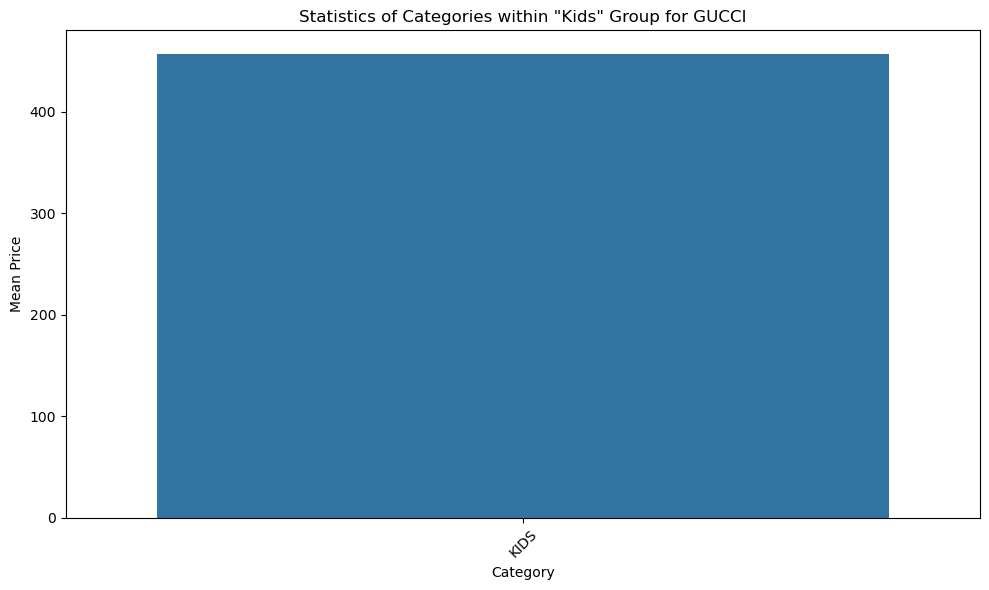

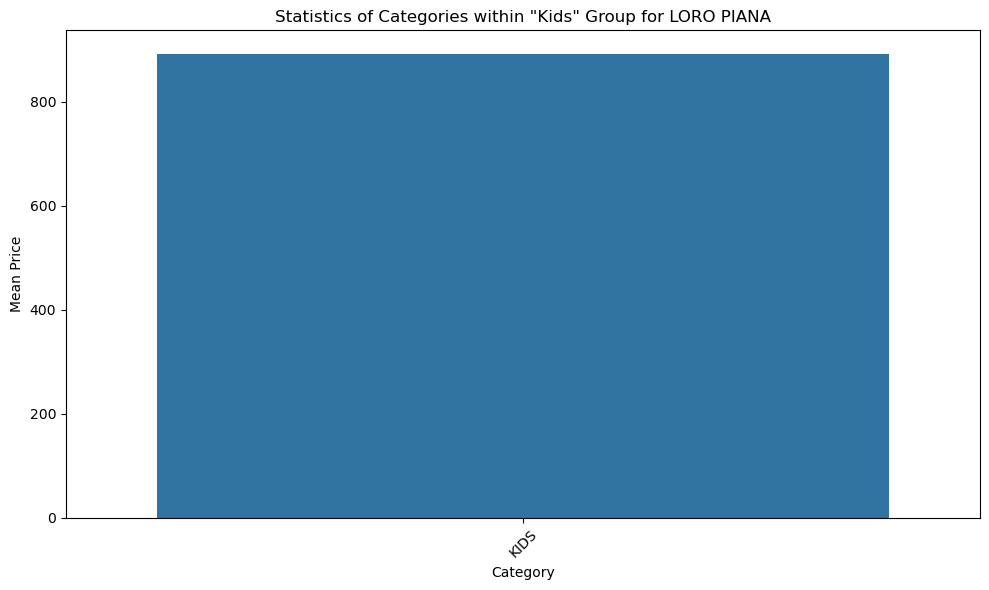

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
kids_data = data[data['Group'] == 'KIDS']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_kids = kids_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand
for brand in category_stats_kids['brand'].unique():
    brand_data = category_stats_kids[category_stats_kids['brand'] == brand]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='full_price_eur', data=brand_data)
    plt.title(f'Statistics of Categories within "Kids" Group for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/1752338812.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

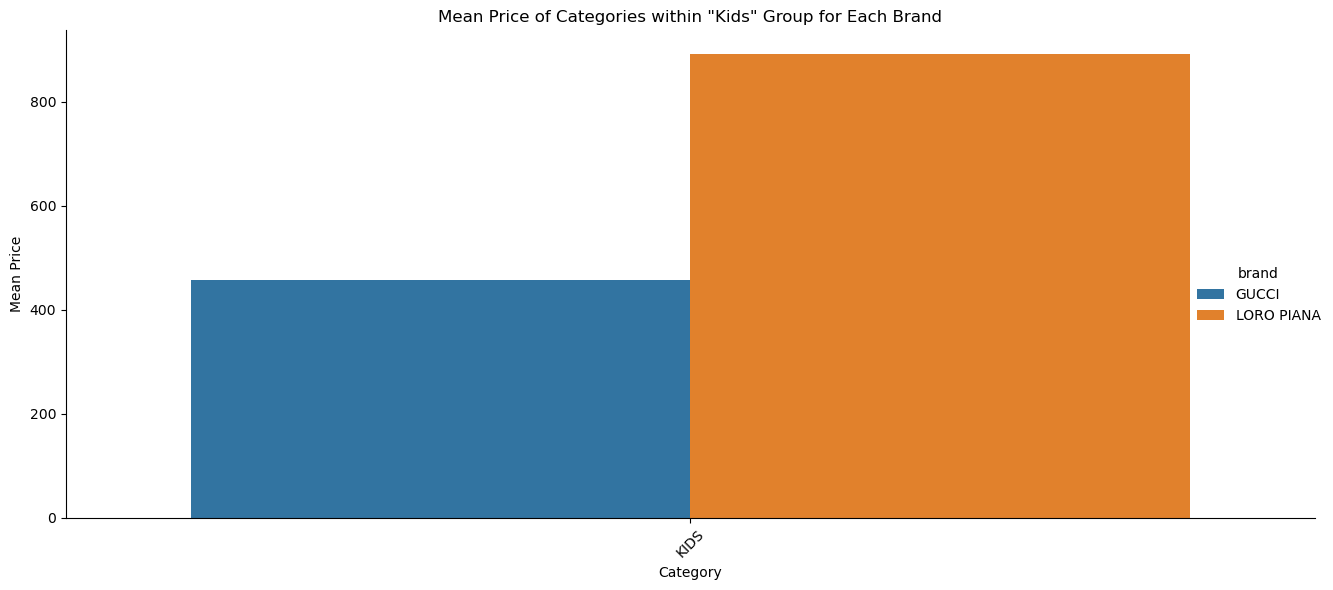

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "kids" group
kids_data = data[data['Group'] == 'KIDS']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_kids = kids_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_kids, height=6, aspect=2)
plt.title('Mean Price of Categories within "Kids" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Boys Group Statistics


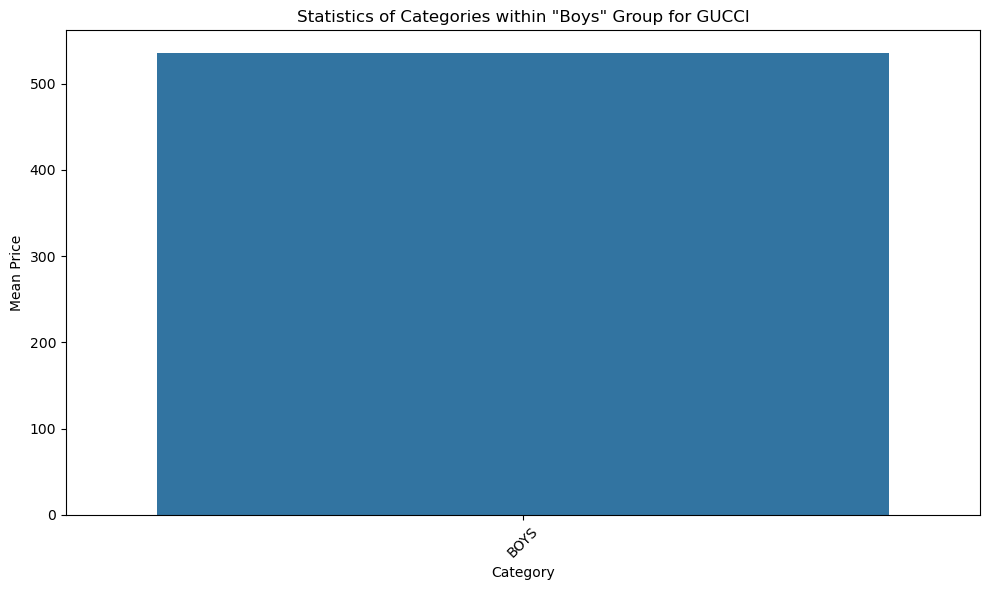

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
Boys_data = data[data['Group'] == 'BOYS']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_boys = Boys_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand
for brand in category_stats_boys['brand'].unique():
    brand_data = category_stats_boys[category_stats_boys['brand'] == brand]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='full_price_eur', data=brand_data)
    plt.title(f'Statistics of Categories within "Boys" Group for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/1037701297.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

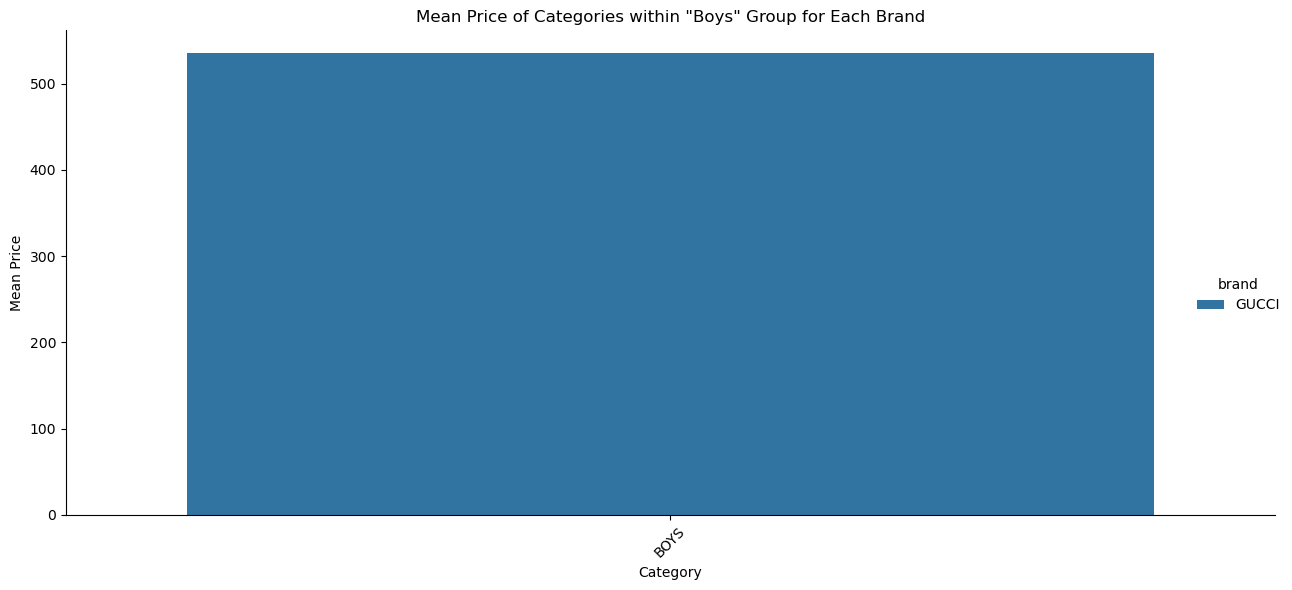

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "boys" group
boys_data = data[data['Group'] == 'BOYS']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_boys = boys_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_boys, height=6, aspect=2)
plt.title('Mean Price of Categories within "Boys" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Girls Group Statistics


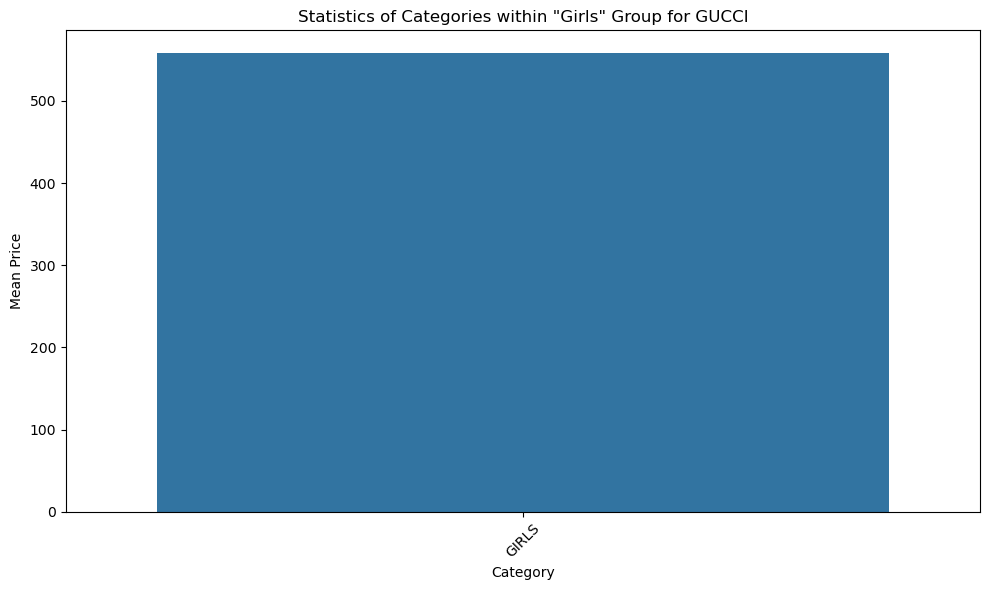

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
Girls_data = data[data['Group'] == 'GIRLS']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_girls = Girls_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand
for brand in category_stats_girls['brand'].unique():
    brand_data = category_stats_girls[category_stats_girls['brand'] == brand]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='full_price_eur', data=brand_data)
    plt.title(f'Statistics of Categories within "Girls" Group for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/2458530002.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

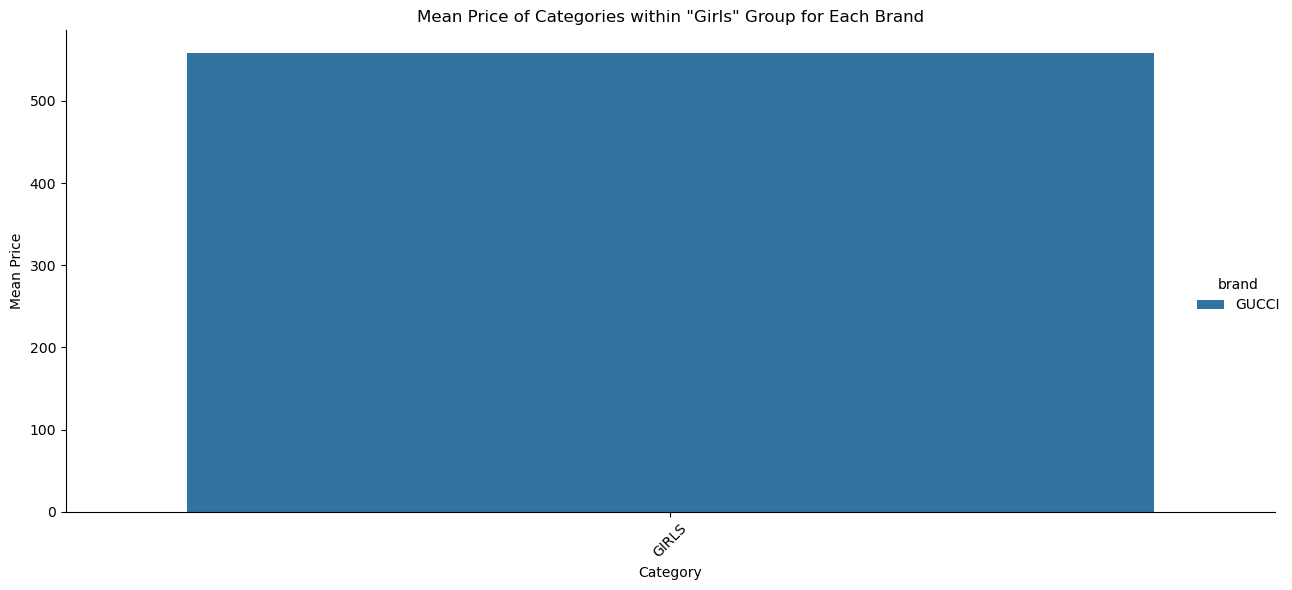

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "girls" group
girls_data = data[data['Group'] == 'GIRLS']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_girls = girls_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_girls, height=6, aspect=2)
plt.title('Mean Price of Categories within "Girls" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Other Group Statistics

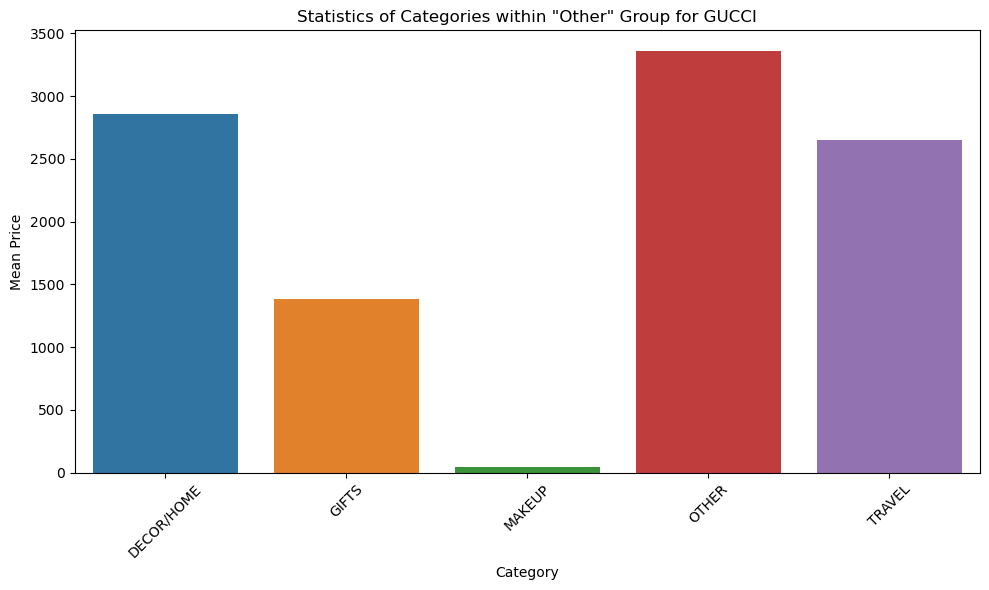

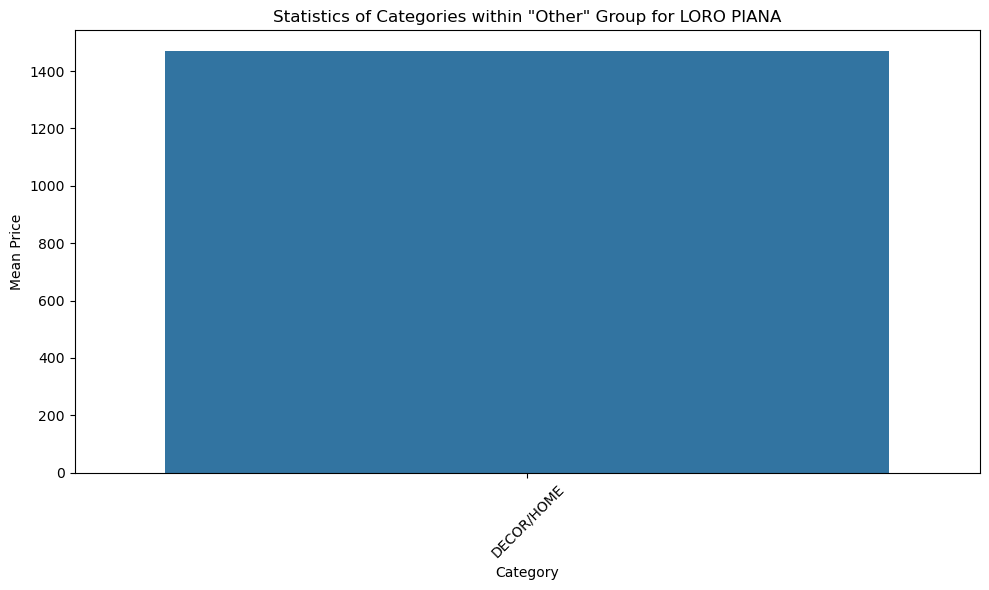

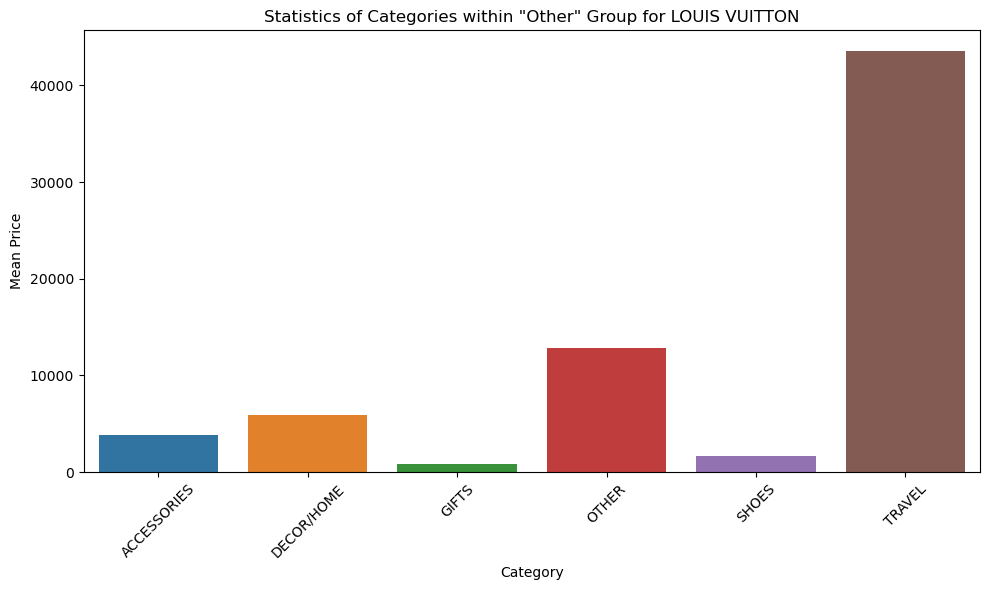

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "men" group
Other_data = data[data['Group'] == 'OTHER']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_other = Other_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand
for brand in category_stats_other['brand'].unique():
    brand_data = category_stats_other[category_stats_other['brand'] == brand]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='full_price_eur', data=brand_data)
    plt.title(f'Statistics of Categories within "Other" Group for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/3895868006.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

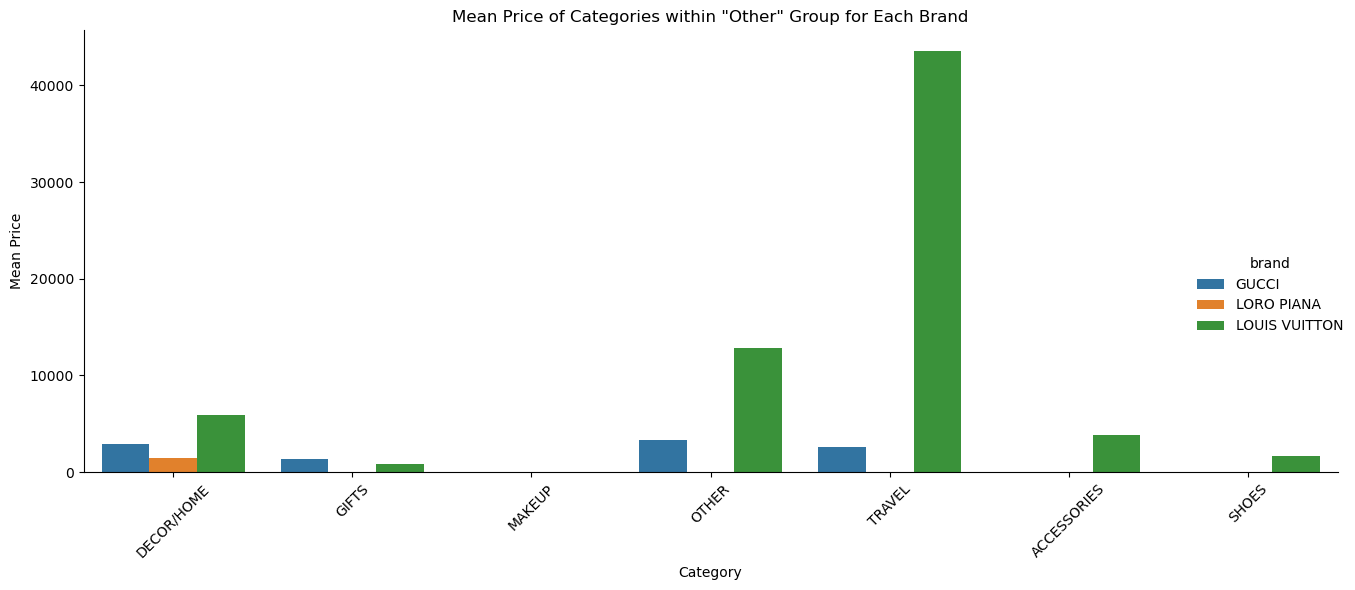

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "other" group
other_data = data[data['Group'] == 'OTHER']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_other = other_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_other, height=6, aspect=2)
plt.title('Mean Price of Categories within "Other" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/SandeepKaur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/z3/f9nzk9ks1cq7spm704hmgx_c0000gp/T/ipykernel_59176/2246413701.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

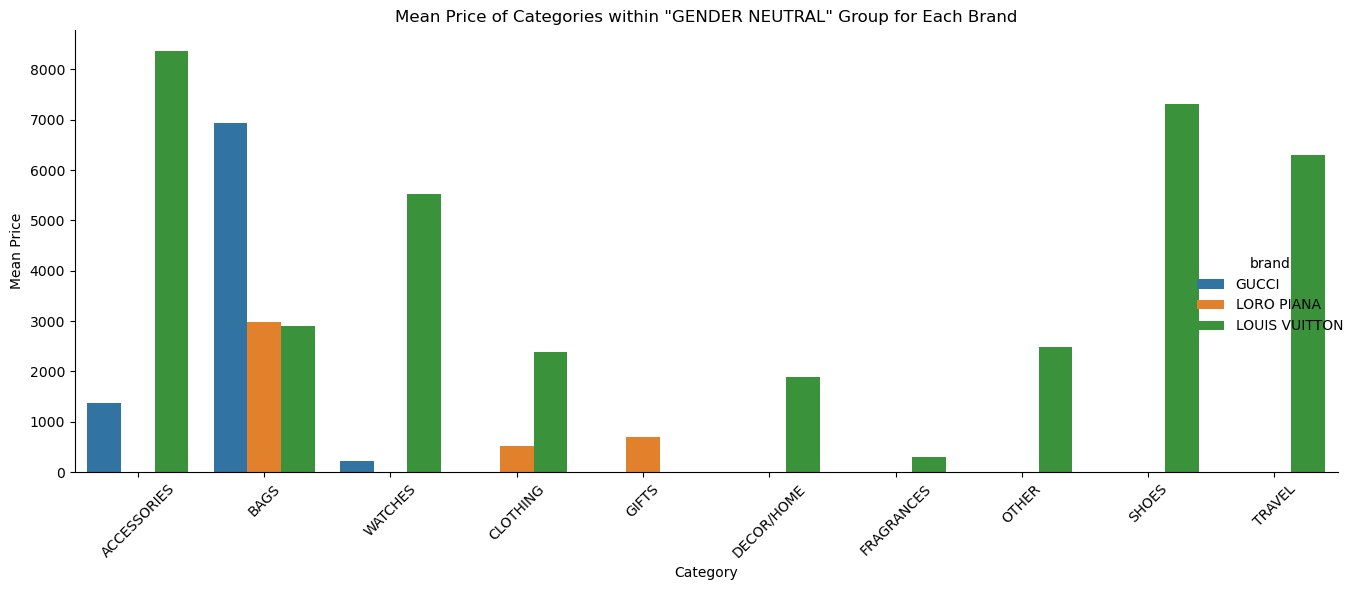

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with columns: 'brand', 'category', and 'price'

# Filter data for the "other" group
gender_neutral_data = data[data['Group'] == 'GENDER NEUTRAL']

# Grouping by brand and category, and calculating statistics (e.g., mean price) for each category
category_stats_gender_neutral = gender_neutral_data.groupby(['brand', 'Category'])['full_price_eur'].mean().reset_index()

# Visualizing the statistics for each brand in one plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Category', y='full_price_eur', hue='brand', kind='bar', data=category_stats_gender_neutral, height=6, aspect=2)
plt.title('Mean Price of Categories within "GENDER NEUTRAL" Group for Each Brand')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Price Distribution based on categories for same brand but different country

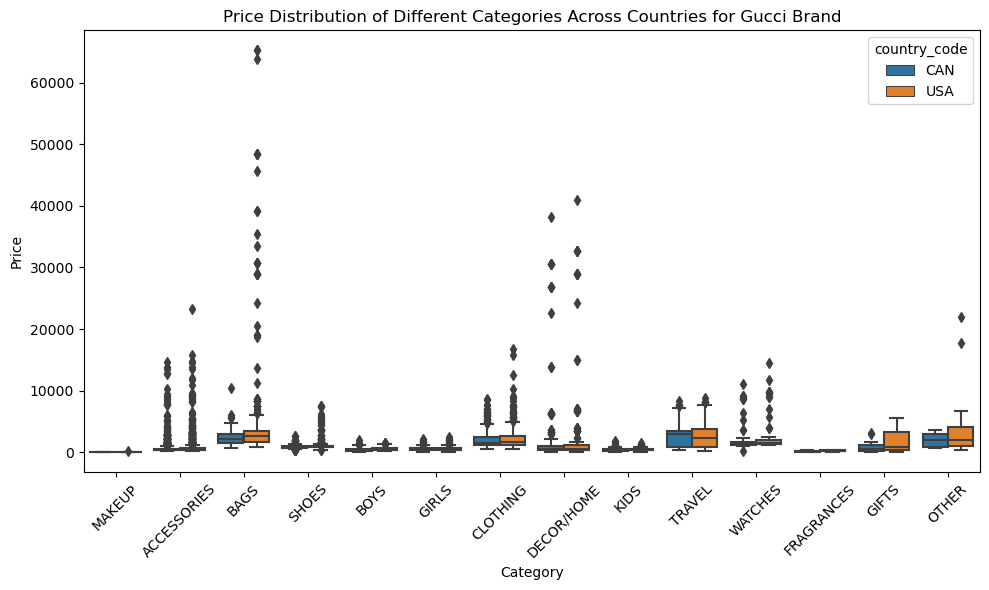

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='full_price_eur', hue='country_code', data=Gucci_data)
plt.title('Price Distribution of Different Categories Across Countries for Gucci Brand')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

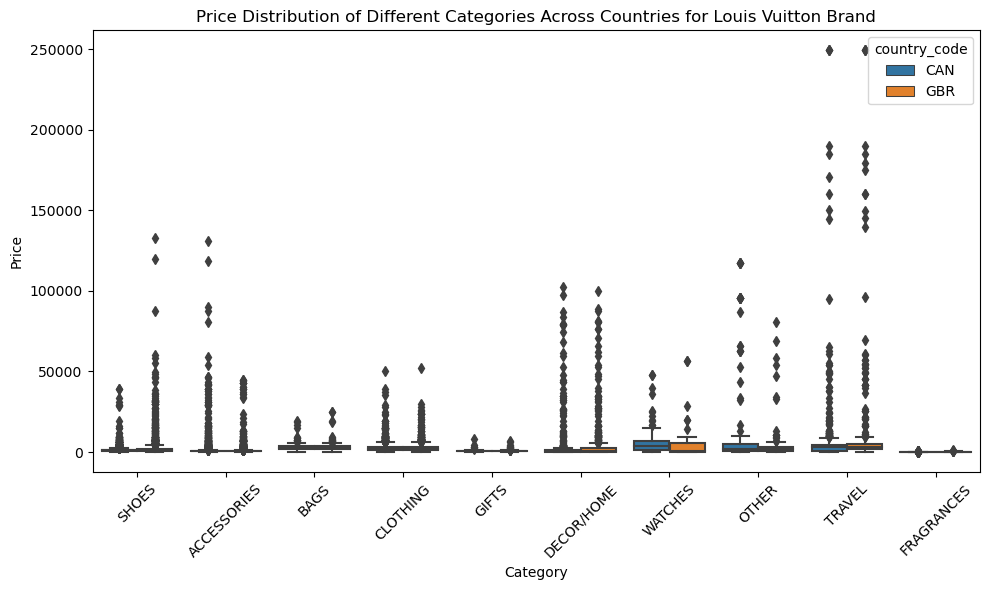

In [60]:
# Plotting

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='full_price_eur', hue='country_code', data=LV_data)
plt.title('Price Distribution of Different Categories Across Countries for Louis Vuitton Brand')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

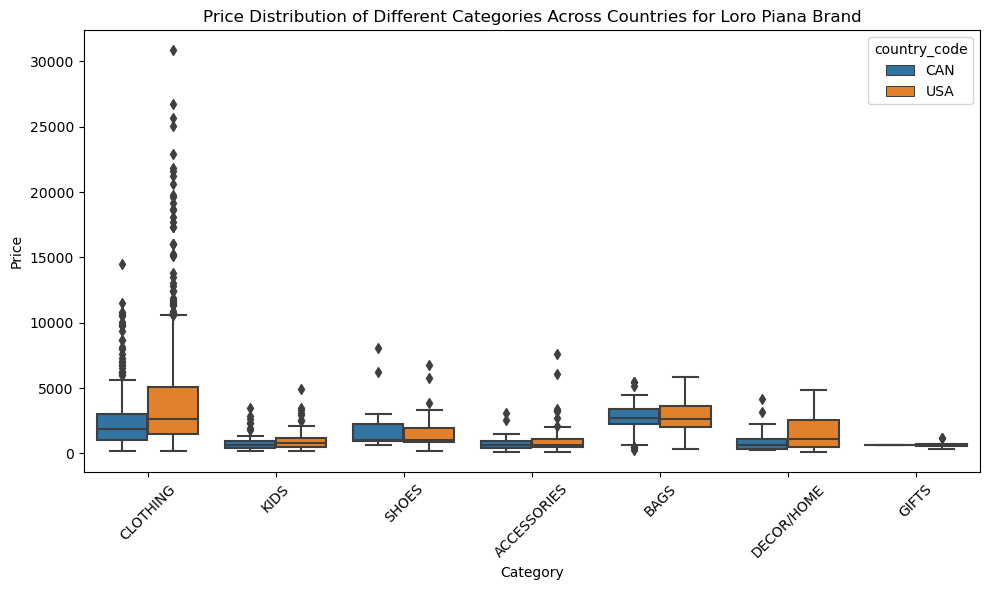

In [62]:
# Plotting

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='full_price_eur', hue='country_code', data=LP_data)
plt.title('Price Distribution of Different Categories Across Countries for Loro Piana Brand')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Price Distribution based on group for same brand but different country

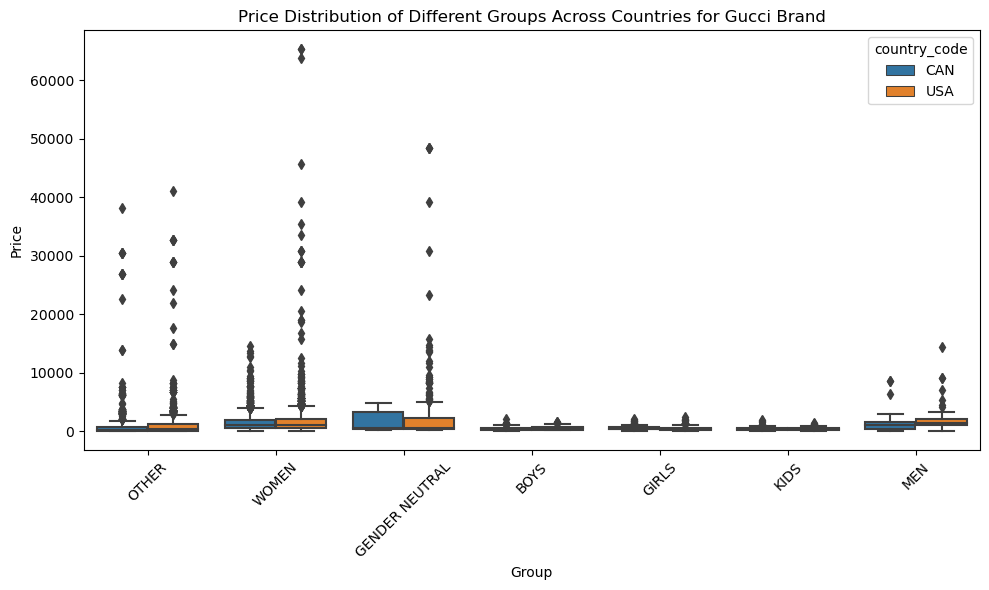

In [65]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='full_price_eur', hue='country_code', data=Gucci_data)
plt.title('Price Distribution of Different Groups Across Countries for Gucci Brand')
plt.xlabel('Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

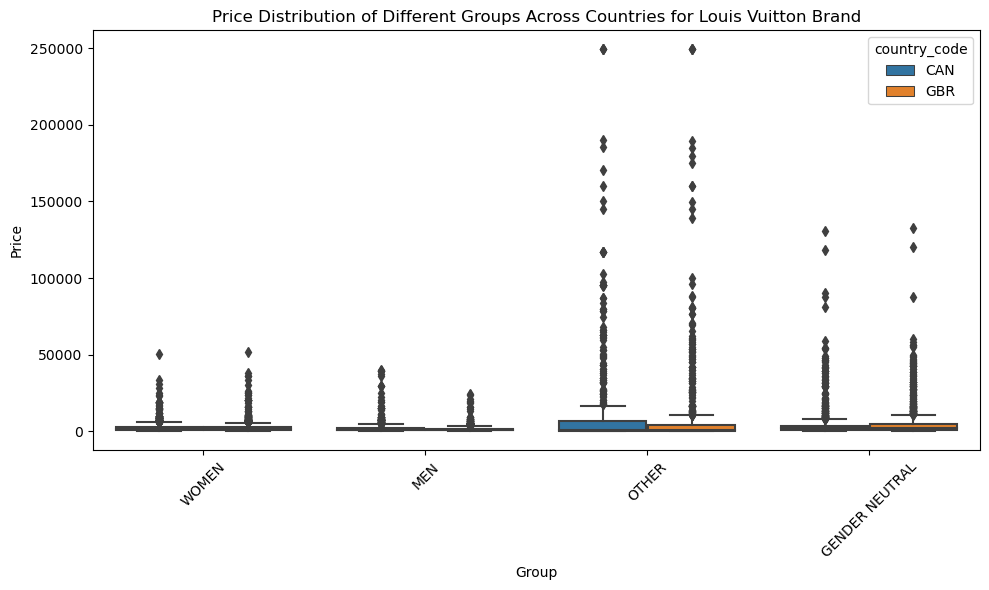

In [66]:
# Plotting

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='full_price_eur', hue='country_code', data=LV_data)
plt.title('Price Distribution of Different Groups Across Countries for Louis Vuitton Brand')
plt.xlabel('Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

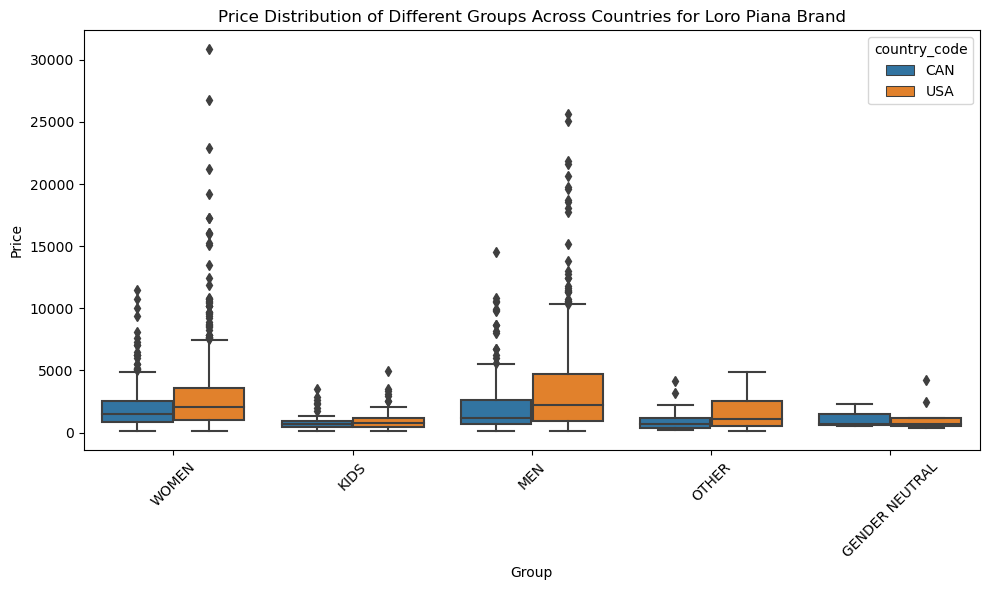

In [67]:
# Plotting

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='full_price_eur', hue='country_code', data=LP_data)
plt.title('Price Distribution of Different Groups Across Countries for Loro Piana Brand')
plt.xlabel('Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()